In [1]:
from sys import version
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from os.path import basename, dirname
print(version)

3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [39]:
all_perf = pd.read_csv("batch_compare.tsv", sep='\t')
perf_weights = all_perf.copy()
all_perf['agg_level'] = all_perf['batch'].apply(lambda x: '15m' if '15m' in x else ('30m' if '30m' in x else 'hr'))
all_perf['model'] = all_perf['batch'].apply(lambda x: x.split('_')[0] + '/'+ x.split('_')[-2])
ns = all_perf.groupby(['model','agg_level','batch','group'])['n'].max().reset_index()

all_perf = all_perf.pivot_table(index=['group'], columns='model', values='mae')
all_perf = all_perf.reset_index().sort_values(['group'])
#all_perf = all_perf.set_index('group')

all_perf

model,group,final/nn,nn/15min,nn/30min,svm/15min,svm/30min,xgb/15min,xgb/30min
0,Conventional Type,8.484480,6.470694,7.758466,20.843963,23.469477,8.138904,10.092513
1,EW route,10.171721,7.061428,9.274442,28.224602,33.123359,9.589530,12.884455
2,Early Morning,6.085533,5.011329,5.645976,22.016050,28.102526,7.539040,8.427167
3,East King County Region,5.080395,3.688738,4.331728,6.297624,13.496113,4.798142,5.876806
4,Evening Peak,11.519532,8.248627,10.614938,18.368434,22.781098,10.202344,13.541041
5,Express Region,20.762806,14.045002,18.800055,65.310174,73.675891,17.654874,25.016728
6,Midday,8.891404,6.500403,7.959431,19.480044,23.902243,7.894685,9.842012
7,Morning Peak,9.188010,6.593124,8.241439,17.145276,21.075920,8.689217,11.359858
8,NS route,8.012995,6.186434,7.338330,15.824964,18.598793,7.561085,9.304147
9,Night,6.206508,4.711781,5.590024,19.757242,21.082273,6.263290,7.604454


In [40]:
ns = ns.drop_duplicates()
ns['type'] = ns['batch'].apply(lambda x: x.rsplit('_',2)[-1])
ns = ns[['group', 'agg_level','model', 'n']].drop_duplicates()
ns

,group,agg_level,model,n
0,Conventional Type,15m,final/nn,53794
1,EW route,15m,final/nn,16002
2,Early Morning,15m,final/nn,1600
3,East King County Region,15m,final/nn,9889
4,Evening Peak,15m,final/nn,13982
5,Express Region,15m,final/nn,12390
6,Midday,15m,final/nn,14541
7,Morning Peak,15m,final/nn,16972
8,NS route,15m,final/nn,51697
9,Night,15m,final/nn,8650


In [26]:
ns.group.unique()

array(['Conventional Type', 'EW route', 'Early Morning',
       'East King County Region', 'Evening Peak', 'Express Region',
       'Midday', 'Morning Peak', 'NS route', 'Night', 'Non-RapidRide',
       'North King County Region', 'RapidRide', 'Seattle Region',
       'South King County Region', 'Summer', 'Trolley Type', 'Weekday',
       'Weekend', 'Weekend Evening', 'Weekend Morning', 'Weekend Peak',
       'Winter', 'high frequency route', 'low frequency route',
       'med frequency route'], dtype=object)

In [56]:
desired_index_order = [
    'Early Morning', 'Morning Peak', 'Midday', 'Evening Peak', 'Night',

    'Weekend Morning', 'Weekend Peak', 'Weekend Evening',

    'Conventional Type', 'Trolley Type',

    'NS route', 'EW route',

    'Express Region', 'East King County Region', 'North King County Region', 
        'Seattle Region', 'South King County Region',

    'RapidRide', 'Non-RapidRide',

    'Winter', 'Summer',

    'Weekday', 'Weekend',

    'high frequency route', 'med frequency route', 'low frequency route',
]

cols15 = ['final/nn'] + [c for c in all_perf.columns if '15m' in c]
cols30 = [c for c in all_perf.columns if '30m' in c]

perf15 = pd.DataFrame()
perf30 = pd.DataFrame()
for i, name in enumerate(desired_index_order[::-1]):
    mod = all_perf.loc[(all_perf['group'] == name), cols15]
    n = ns.loc[(ns['group'] == name) & (ns['agg_level'] == '15m'), 'n'].values #& ns['model'].apply(lambda x: 'combined' in x), 'n'].values
    if len(n) > 0:
        n=n[0]
    else:
        n=0
    mod['label'] = f'{name}\nn={n}'
    perf15 = pd.concat([
        perf15,
        mod
    ])

for i, name in enumerate(desired_index_order):
    mod = all_perf.loc[(all_perf['group'] == name), cols30]
    n = ns.loc[(ns['group'] == name) & (ns['agg_level'] == '30m'), 'n'].values  # & ns['model'].apply(lambda x: 'combined' in x)
    if len(n) > 0:
        n=n[0]
    else:
        n=0
    mod['label'] = f'{name}\nn={n}'
    perf30 = pd.concat([
        perf30,
        mod
    ])

perf15.set_index('label', inplace=True)
perf30.set_index('label', inplace=True)

In [52]:
perf15.head()

model,final/nn,nn/15min,svm/15min,xgb/15min
label,,,,
Early Morning\nn=1600,6.085533,5.011329,22.016050,7.539040
Morning Peak\nn=16972,9.188010,6.593124,17.145276,8.689217
Midday\nn=14541,8.891404,6.500403,19.480044,7.894685
Evening Peak\nn=13982,11.519532,8.248627,18.368434,10.202344
Night\nn=8650,6.206508,4.711781,19.757242,6.263290


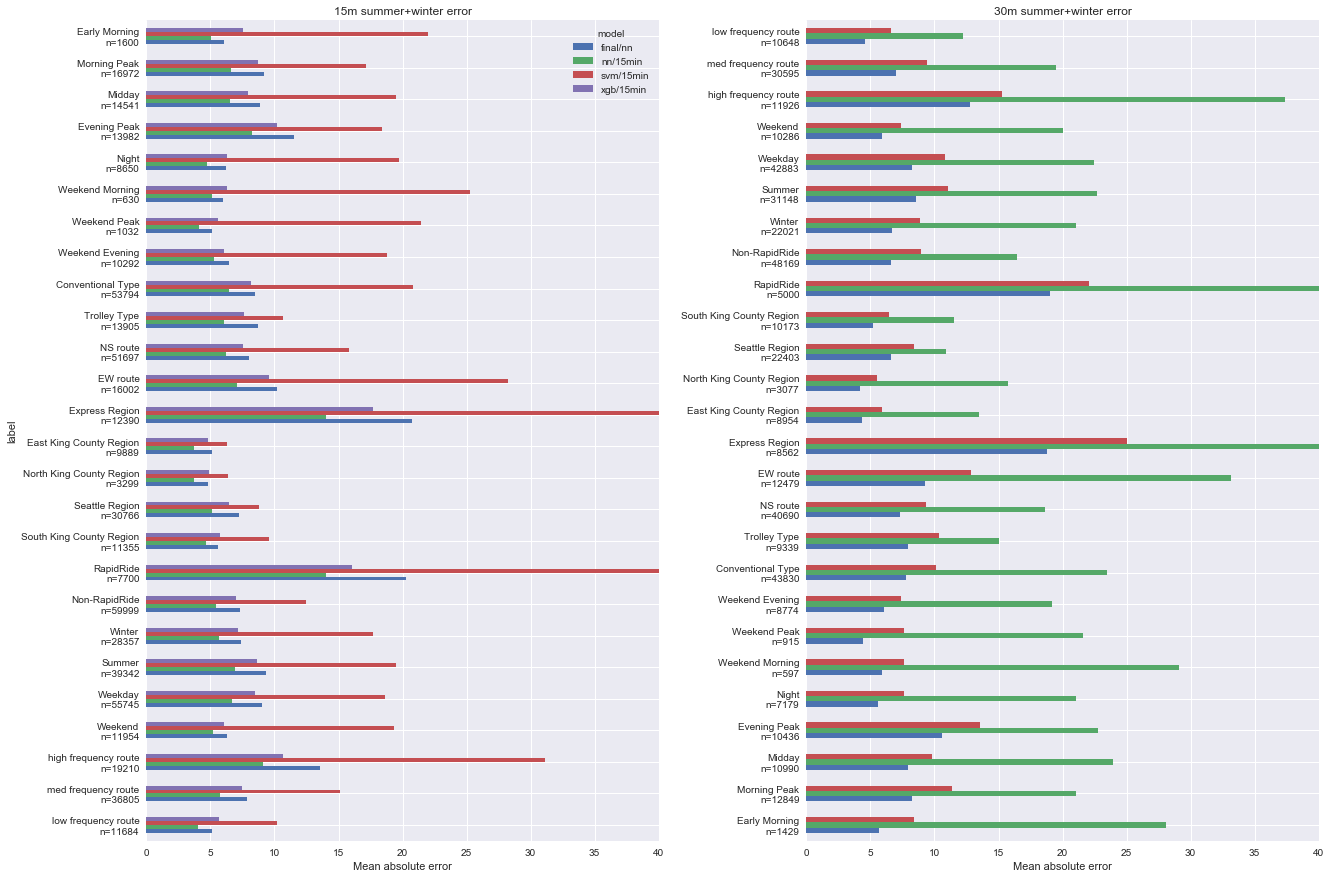

In [60]:
plt.style.use('seaborn')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))
fig.tight_layout(pad=12)

perf15[cols15].plot.barh(
   rot=0, 
   ax=axes[0], 
   title="15m summer+winter error", 
   align='center', 
   xlim=shared_xlim)

perf30[cols30].plot.barh(
    rot=0, 
    ax=axes[1], 
    title="30m summer+winter error", 
    legend=False, 
    align='center', 
    xlim=shared_xlim)

axes[0].set_xlabel("Mean absolute error")
axes[1].set_xlabel("Mean absolute error")
axes[1].set_ylabel('')
plt.show()

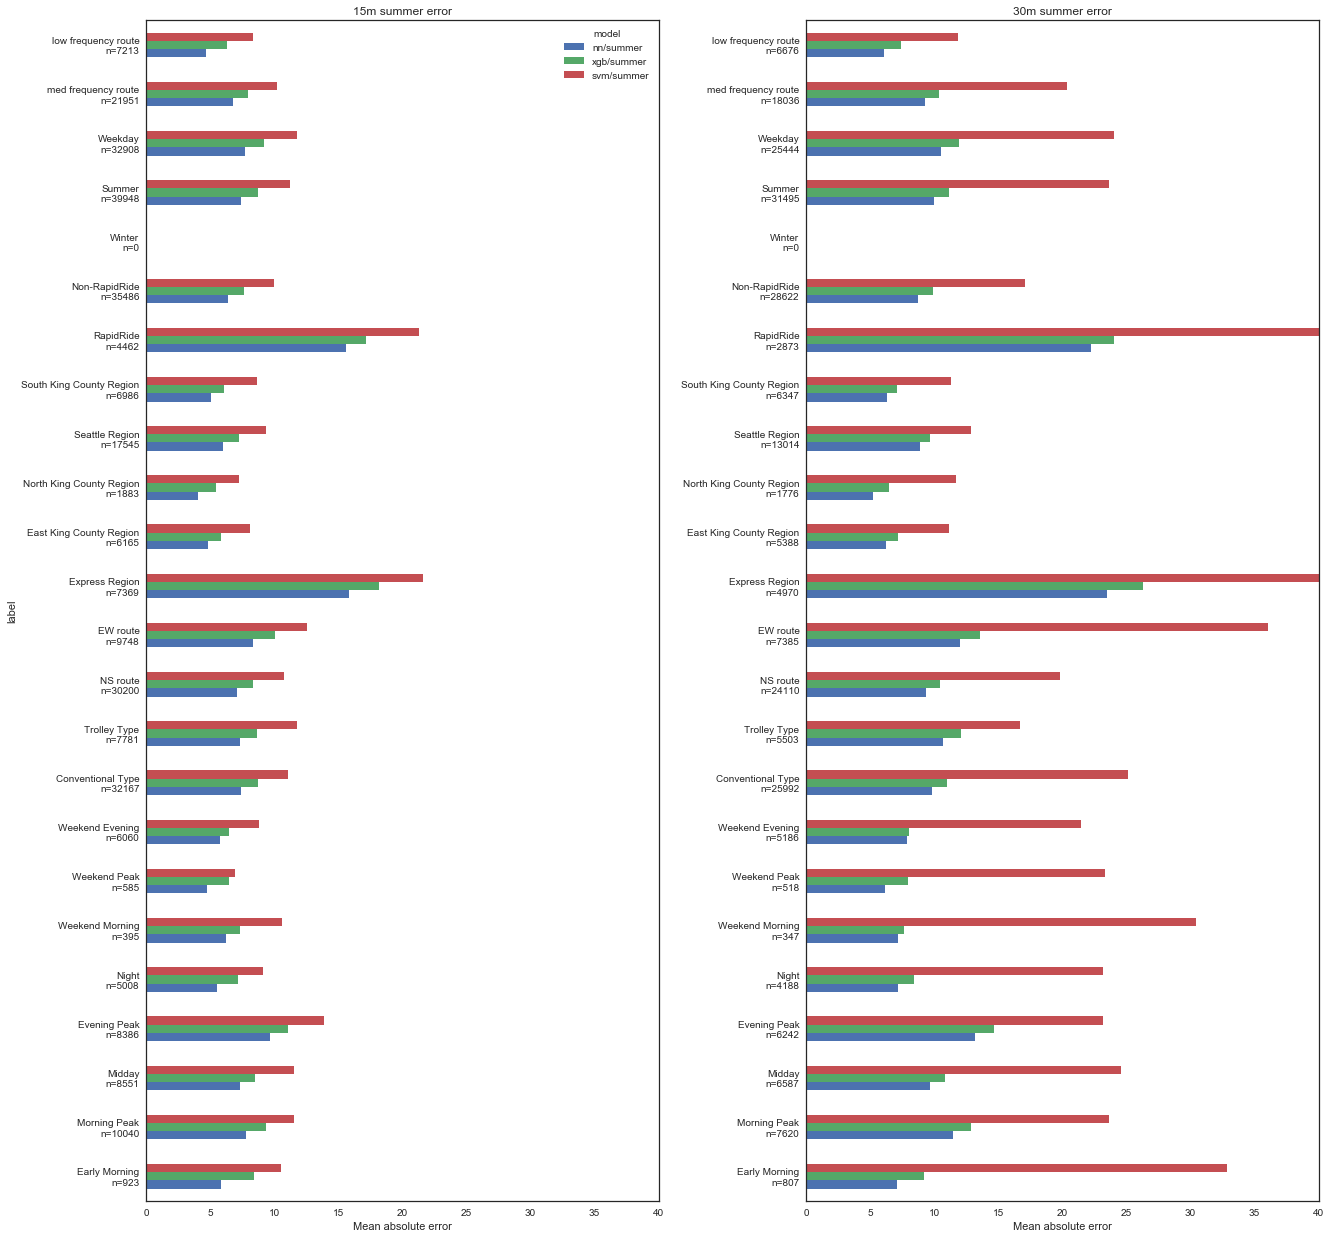

In [176]:
perf15 = pd.DataFrame()
perf30 = pd.DataFrame()
for i, name in enumerate(desired_index_order):
    mod = all_perf.loc[(all_perf['group'] == name) & (all_perf['agg_level'] == '15m'),]
    n = ns.loc[(ns['group'] == name) & (ns['agg_level'] == '15m') & (ns['type']=='summer'), 'n'].values
    if len(n) > 0:
        n=n[0]
    else:
        n=0
    mod['label'] = f'{name}\nn={n}'
    perf15 = pd.concat([
        perf15,
        mod
    ])

for i, name in enumerate(desired_index_order):
    mod = all_perf.loc[(all_perf['group'] == name) & (all_perf['agg_level'] == '30m'),]
    n = ns.loc[(ns['group'] == name) & (ns['agg_level'] == '30m') & (ns['type']=='summer'), 'n'].values
    if len(n) > 0:
        n=n[0]
    else:
        n=0
    mod['label'] = f'{name}\nn={n}'
    perf30 = pd.concat([
        perf30,
        mod
    ])

perf15.set_index('label', inplace=True)
perf30.set_index('label', inplace=True)

plt.style.use('seaborn-white')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,20))
fig.tight_layout(pad=12)

cols = [c for c in columns if 'summer' in c]
perf15[cols].plot.barh(
   rot=0, 
   ax=axes[0], 
   title="15m summer error", 
   align='center', 
   xlim=shared_xlim)

perf30[cols].plot.barh(
    rot=0, 
    ax=axes[1], 
    title="30m summer error", 
    legend=False, 
    align='center', 
    xlim=shared_xlim)

axes[0].set_xlabel("Mean absolute error")
axes[1].set_xlabel("Mean absolute error")
axes[1].set_ylabel('')
plt.show()

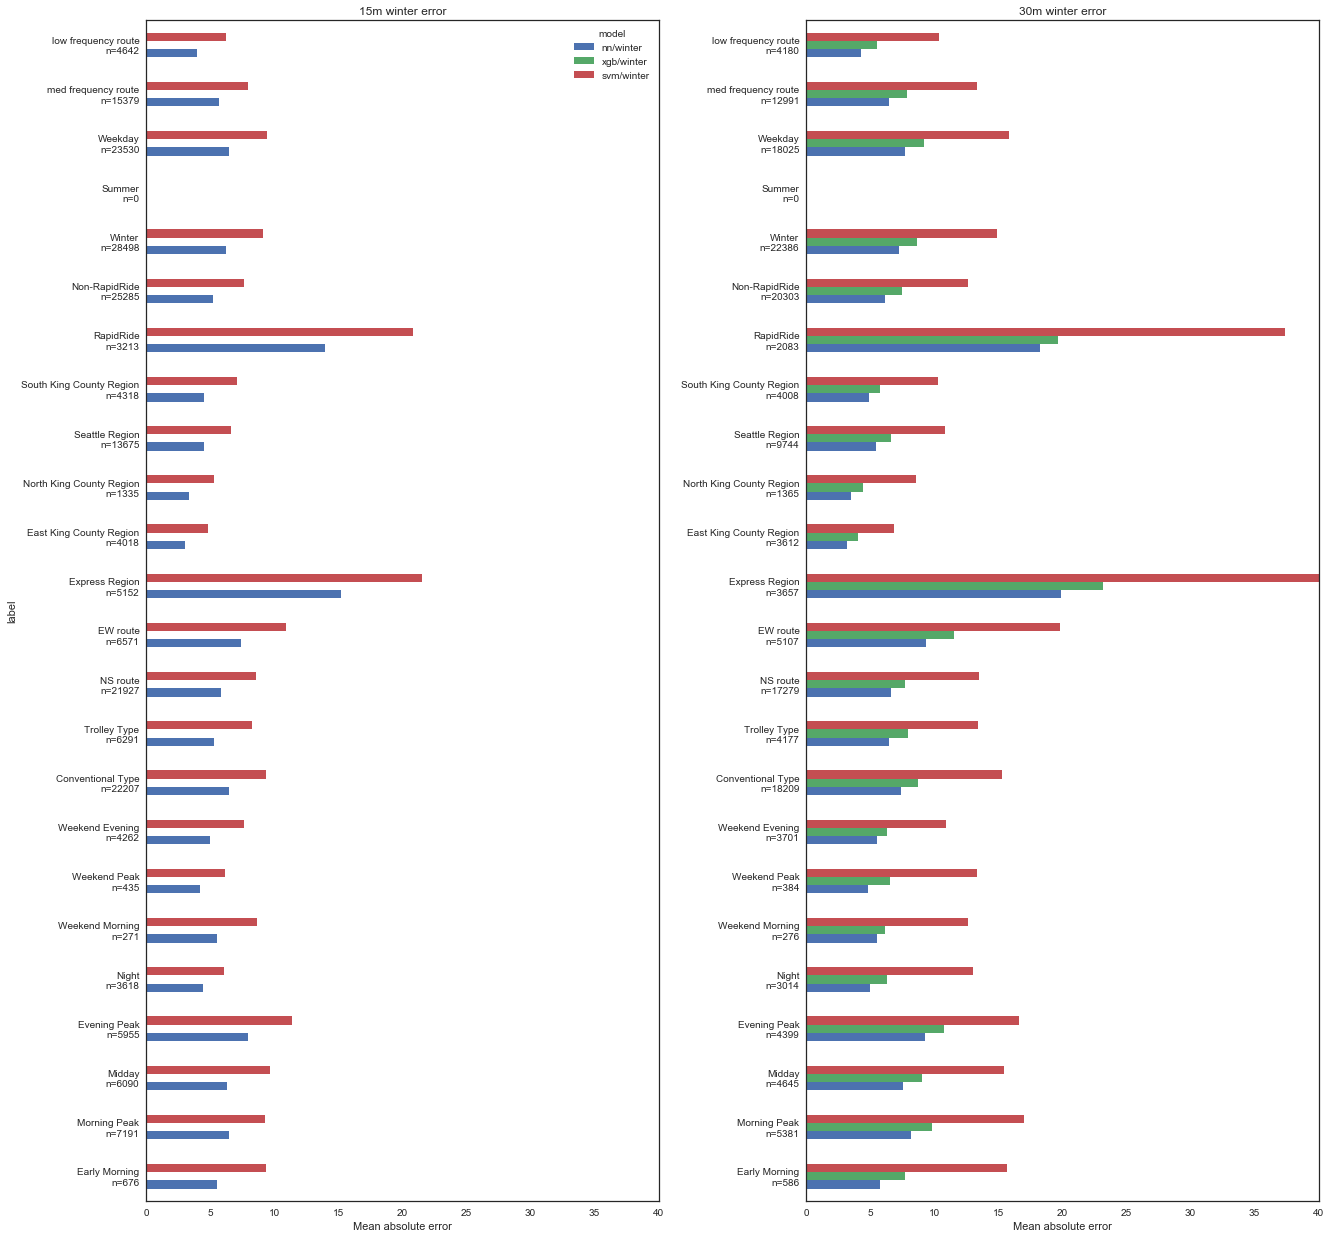

In [177]:


perf15 = pd.DataFrame()
perf30 = pd.DataFrame()
for i, name in enumerate(desired_index_order):
    mod = all_perf.loc[(all_perf['group'] == name) & (all_perf['agg_level'] == '15m'),]
    n = ns.loc[(ns['group'] == name) & (ns['agg_level'] == '15m') & (ns['type']=='winter'), 'n'].values
    if len(n) > 0:
        n=n[0]
    else:
        n=0
    mod['label'] = f'{name}\nn={n}'
    perf15 = pd.concat([
        perf15,
        mod
    ])

for i, name in enumerate(desired_index_order):
    mod = all_perf.loc[(all_perf['group'] == name) & (all_perf['agg_level'] == '30m'),]
    n = ns.loc[(ns['group'] == name) & (ns['agg_level'] == '30m') & (ns['type']=='winter'), 'n'].values
    if len(n) > 0:
        n=n[0]
    else:
        n=0
    mod['label'] = f'{name}\nn={n}'
    perf30 = pd.concat([
        perf30,
        mod
    ])

perf15.set_index('label', inplace=True)
perf30.set_index('label', inplace=True)
plt.style.use('seaborn-white')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,20))
fig.tight_layout(pad=12)

cols = [c for c in columns if 'winter' in c]
perf15[cols].plot.barh(
   rot=0, 
   ax=axes[0], 
   title="15m winter error", 
   align='center', 
   xlim=shared_xlim)

perf30[cols].plot.barh(
    rot=0, 
    ax=axes[1], 
    title="30m winter error", 
    legend=False, 
    align='center', 
    xlim=shared_xlim)

axes[0].set_xlabel("Mean absolute error")
axes[1].set_xlabel("Mean absolute error")
axes[1].set_ylabel('')
plt.show()

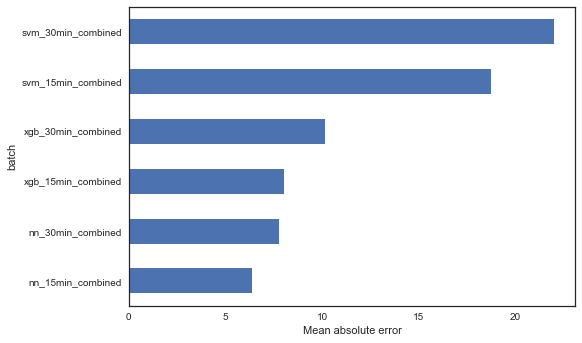

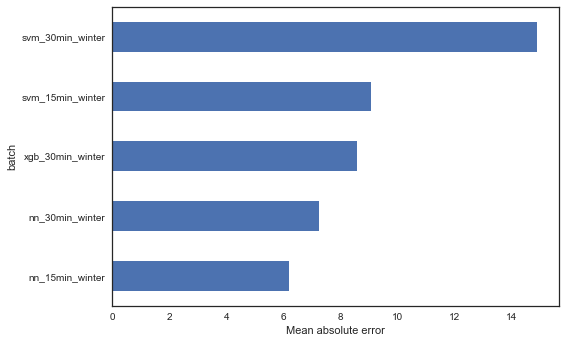

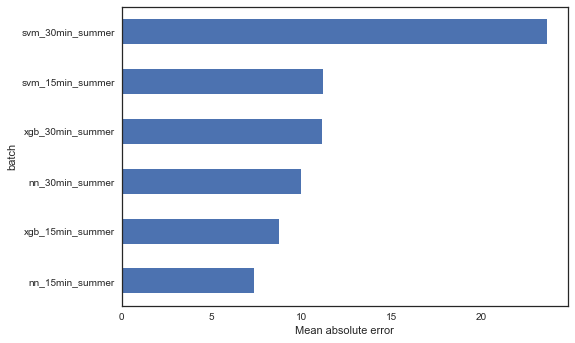

In [219]:
# Possible to recover overall MAE from the weighted n?
batches = list()
models = list()
seasons = list()
maes = list()
for batch in perf_weights['batch'].unique():
    dat = perf_weights.loc[perf_weights['batch']==batch,]
    total_n = dat['n'].sum()
    mae = (dat['mae'] * dat['n']).sum() / total_n
    batches.append(batch)
    models.append(batch.split("_")[0])
    seasons.append(batch.split("_")[-1])
    maes.append(mae)

dat = pd.DataFrame({
    'batch': batches,
    'model': models,
    'season': seasons,
    'mae': maes
}).sort_values('mae')

dat.loc[dat['season']=='combined'].set_index('batch')['mae'].plot.barh()
plt.xlabel("Mean absolute error")
plt.show()

dat.loc[dat['season']=='winter'].set_index('batch')['mae'].plot.barh()
plt.xlabel("Mean absolute error")
plt.show()

dat.loc[dat['season']=='summer'].set_index('batch')['mae'].plot.barh()
plt.xlabel("Mean absolute error")
plt.show()